<a href="https://colab.research.google.com/github/jeevith2011/mini-projects-basics/blob/main/MiniProject_6_Ebola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **Tips**
Some tips that will get you started (and help you when you're confused)

##Weekly meeting tips


1.   These meeting are recorded! Keep it short and sweet!
2.   Describe your what you achieved in code in 5-10 minutes.
3.   What is blocking you? Any blockers? Explain it in a weekly meeting.



## Confused? Here's the steps to finish the project:


1. Read the readme document
2. Watch pair coding videos in order by date
3. Code with the videos
4. If you have any problems, describe it in a weekly meeting and it will be fixed
5. When done, push to Git/GitHub
6. Also, make a presentation about what you learned
7. Once completed with the whole section, do the final report

**Also, make sure to change the compute engine when switching miniprojects.**

**That's it!**

### **If you are experiencing issues with setup scripts, add the Zoom-Recordings-Common folder after the MyDrive folder.**

# **Setup Script**

In [ ]:
from google.colab import drive
import pandas as pd
from pandas.core.algorithms import value_counts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# NOTE: this will pop up asking for google login permission
drive.mount('/content/drive')
# linux command to list the files under linux running
#Colab Jupyter notebook (prints dir/files/links in your Drive)

# Airport ID, Name of airport, City, Country, IATA, ICAO, Latitude, Longitude, Altitude, Timezone, DST, TZ Database Timezone, Type, Source
# See https://openflights.org/data.php for help

!ls -ltr /content/drive/MyDrive/ | grep *.csv
!ls -ltr /content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/
!ls -ltr /content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset_ebola | grep dataset
!ls -ltr /content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset_ebola/ebola_data_db_format.csv | grep dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
total 52
dr-x------ 2 root root 4096 Feb 26  2022 dataset-titanic
dr-x------ 2 root root 4096 Feb 26  2022 dataset-powerlifting-csv
dr-x------ 2 root root 4096 Feb 26  2022 dataset_open_crime_uk
dr-x------ 2 root root 4096 Feb 26  2022 dataset-google-scholar
dr-x------ 2 root root 4096 Feb 26  2022 dataset_ebola
dr-x------ 2 root root 4096 Feb 26  2022 dataset-domestic-flights-from-1990-to-2009
dr-x------ 2 root root 4096 Feb 26  2022 dataset-covid-2
dr-x------ 2 root root 4096 Feb 26  2022 dataset-covid
dr-x------ 2 root root 4096 Feb 26  2022 dataset-airports
dr-x------ 2 root root 4096 Mar  5  2022 dataset-museum-artifacts
dr-x------ 2 root root 4096 Mar  5  2022 dataset-world-economy-worldbank
dr-x------ 2 root root 4096 Jun 21  2023 dataset-hr
dr-x------ 2 root root 4096 Nov 11 19:19 dataset-forest-fire
-r-------- 1 root root 1422467 Feb 19  2022 /conten

# TASK 1
Distinct # of Indicators in the universe (complete dataset). \
Output:
Integer value


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset_ebola/ebola_data_db_format.csv")
df.columns = ['Indicator', 'Country', 'Date', 'Value']

df = df.groupby('Indicator').nunique() # getting list of indicators using groupby and nunique

indicators_count = df.index.size # getting length of dataframe using .index.size

print(indicators_count)

36


# TASK 2
In the second half of the year 2015, how many countries have one or more “Cumulative number of confirmed Ebola cases” \
Output:
Integer value

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset_ebola/ebola_data_db_format.csv")
df.columns = ['Indicator', 'Country', 'Date', 'Value']

indicator = 'Cumulative number of confirmed Ebola cases'

# using regex to filter second half of year 2015
# regex101 is a great tool for creating regex -> regex101.com
filtered_df = df[df.Date.str.match(r'2015-(07|08|09|10|11|12)-\d\d')]

# getting indicator with 'Cumulative number of confirmed Ebola cases'
filtered_df = df.loc[df['Indicator'] == 'Cumulative number of confirmed Ebola cases']

filtered_df = filtered_df.groupby('Country').sum() # getting list of countries using groupby and nunique

amt_countries = filtered_df.index.size # getting length of dataframe using .index.size

print(amt_countries)

12


# TASK 3
Top 10 total Ebola cases confirmed. Note that Indicator = Cumulative number of confirmed Ebola cases. Include rank based on the total value (=cases confirmed). \
Output:
country, total_value, rank

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset_ebola/ebola_data_db_format.csv")
df.columns = ['Indicator', 'Country', 'Date', 'Value']

indicator = 'Cumulative number of confirmed Ebola cases'

# getting indicator with 'Cumulative number of confirmed Ebola cases'
df = df.loc[df['Indicator'] == 'Cumulative number of confirmed Ebola cases']

# sorting dataframe by highest amount of Ebola cases
df = df.sort_values('Value', ascending=False) # sorting by value

# Removing duplicates and selecting highest value
df = df.drop_duplicates('Country', keep='first').head(10)

# Resetting indexes for cleaner apperance
df = df.reset_index()

# Removing unnecessary columns
df = df.drop(df.columns[[0, 2]], axis=1)

# Adding rank column
df['Rank'] = range(1, 11)

print(df)

                                    Indicator        Date   Value  Rank
0  Cumulative number of confirmed Ebola cases  2015-11-24  8704.0     1
1  Cumulative number of confirmed Ebola cases  2015-11-17  3351.0     2
2  Cumulative number of confirmed Ebola cases  2015-03-02  3153.0     3
3  Cumulative number of confirmed Ebola cases  2015-07-01    19.0     4
4  Cumulative number of confirmed Ebola cases  2016-03-23     9.0     5
5  Cumulative number of confirmed Ebola cases  2015-07-30     7.0     6
6  Cumulative number of confirmed Ebola cases  2015-11-17     4.0     7
7  Cumulative number of confirmed Ebola cases  2016-03-23     2.0     8
8  Cumulative number of confirmed Ebola cases  2015-10-29     1.0     9
9  Cumulative number of confirmed Ebola cases  2015-10-20     1.0    10


# TASK 4
Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” in 2015 Q2 (i.e., April-June 2015). \
Output:
country, total_cases, rank

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset_ebola/ebola_data_db_format.csv")
df.columns = ['Indicator', 'Country', 'Date', 'Value']

indicator = 'Cumulative number of confirmed, probable and suspected Ebola cases'

# getting indicator with 'Cumulative number of confirmed probable and suspected Ebola deaths'
df = df.loc[df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola cases']

# using regex to filter second quarter of year 2015
# regex101 is a great tool for creating regex -> regex101.com
df = df[df.Date.str.match(r'2015-(04|05|06)-\d\d')]

# sorting dataframe by highest amount of Ebola cases
df = df.sort_values('Value', ascending=False) # sorting by value

# Removing duplicates and selecting highest value, and selecting top 10
df = df.drop_duplicates('Country', keep='first').head(10)

# Resetting indexes for cleaner apperance
df = df.reset_index()

# Removing unnecessary columns
df = df.drop(df.columns[[0, 2, 3]], axis=1)

# Adding rank column
df['Rank'] = range(1, 11)

print(df)

                                           Indicator    Value  Rank
0  Cumulative number of confirmed, probable and s...  13119.0     1
1  Cumulative number of confirmed, probable and s...  10666.0     2
2  Cumulative number of confirmed, probable and s...   3729.0     3
3  Cumulative number of confirmed, probable and s...     20.0     4
4  Cumulative number of confirmed, probable and s...      8.0     5
5  Cumulative number of confirmed, probable and s...      4.0     6
6  Cumulative number of confirmed, probable and s...      1.0     7
7  Cumulative number of confirmed, probable and s...      1.0     8
8  Cumulative number of confirmed, probable and s...      1.0     9
9  Cumulative number of confirmed, probable and s...      1.0    10


# TASK 5
Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” with only even months of the year 2015 (i.e., months 2, 4, 6, 8, 10, 12). \
Output:
country, total_cases, rank

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset_ebola/ebola_data_db_format.csv")
df.columns = ['Indicator', 'Country', 'Date', 'Value']

indicator = 'Cumulative number of confirmed, probable and suspected Ebola cases'

# getting indicator with 'Cumulative number of confirmed probable and suspected Ebola deaths'
df = df.loc[df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola cases']

# using regex to filter even months of year 2015
# regex101 is a great tool for creating regex -> regex101.com
df = df[df.Date.str.match(r'2015-(02|04|06|08|10|12)-\d\d')]

# sorting dataframe by highest amount of Ebola cases
df = df.sort_values('Value', ascending=False) # sorting by value

# Removing duplicates and selecting highest value, and selecting top 10
df = df.drop_duplicates('Country', keep='first').head(10)

# Resetting indexes for cleaner apperance
df = df.reset_index()

# Removing unnecessary columns
df = df.drop(df.columns[[0, 2, 3]], axis=1)

# Adding rank column
df['Rank'] = range(1, 11)

print(df)

                                           Indicator    Value  Rank
0  Cumulative number of confirmed, probable and s...  14122.0     1
1  Cumulative number of confirmed, probable and s...  10666.0     2
2  Cumulative number of confirmed, probable and s...   3809.0     3
3  Cumulative number of confirmed, probable and s...     20.0     4
4  Cumulative number of confirmed, probable and s...      9.0     5
5  Cumulative number of confirmed, probable and s...      8.0     6
6  Cumulative number of confirmed, probable and s...      4.0     7
7  Cumulative number of confirmed, probable and s...      1.0     8
8  Cumulative number of confirmed, probable and s...      1.0     9
9  Cumulative number of confirmed, probable and s...      1.0    10


# TASK 6
Find Country and Indicator wise total value. Also, rank on the total_value which is the sum at the Country-Indicator level. \
Output:
country, indicator, total_value, country_indicator_rank

"Find the top 10 of a Country-Indicator pair."

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset_ebola/ebola_data_db_format.csv")
df.columns = ['Indicator', 'Country', 'Date', 'Value']

# Groupby multiple columns
df = df.groupby(['Country', 'Indicator'], as_index=False) \
    .Value \
    .sum() \
    .sort_values(by='Value', ascending=False) \
    .reset_index() \
    .head(10)

df['Rank'] = range(1, 11)

print(df)

   index       Country                                          Indicator  \
0    169  Sierra Leone  Cumulative number of confirmed, probable and s...   
1     60       Liberia  Cumulative number of confirmed, probable and s...   
2    167  Sierra Leone         Cumulative number of confirmed Ebola cases   
3     64       Liberia         Cumulative number of suspected Ebola cases   
4     61       Liberia  Cumulative number of confirmed, probable and s...   
5    173  Sierra Leone         Cumulative number of suspected Ebola cases   
6    170  Sierra Leone  Cumulative number of confirmed, probable and s...   
7      6        Guinea  Cumulative number of confirmed, probable and s...   
8    168  Sierra Leone        Cumulative number of confirmed Ebola deaths   
9     58       Liberia         Cumulative number of confirmed Ebola cases   

       Value  Rank  
0  3003428.0     1  
1  2458408.0     2  
2  2041871.0     3  
3  1211996.0     4  
4  1099610.0     5  
5   893756.0     6  
6   8

# TASK 7
For those Top 10 countries by Indicator = Cumulative number of confirmed Ebola cases, plot group bar chart. \

X-axis -> Country \
Y-axis -> Bar 1 -> total_value with Indicator = Cumulative number of suspected Ebola cases \
Y-axis -> Bar 2 ->  total_value with Indicator = Cumulative number of confirmed Ebola cases

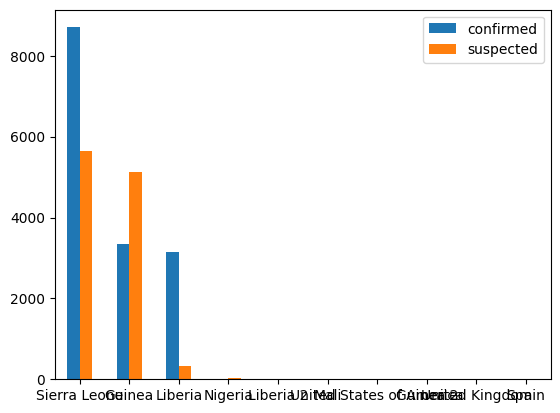

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset_ebola/ebola_data_db_format.csv")
df.columns = ['Indicator', 'Country', 'Date', 'Value']

# getting indicator with 'Cumulative number of confirmed Ebola cases'
# or Cumulative number of suspected Ebola cases'
df1 = df.loc[df['Indicator'] == 'Cumulative number of confirmed Ebola cases']
df2 = df.loc[df['Indicator'] == 'Cumulative number of suspected Ebola cases']

# sorting dataframe by highest amount of Ebola cases
df1 = df1.sort_values('Value', ascending=False) # sorting by value
df2 = df2.sort_values('Value', ascending=False)

# Removing duplicates and selecting highest value
df1 = df1.drop_duplicates('Country', keep='first').head(10)
df2 = df2.drop_duplicates('Country', keep='first').head(10)

# Resetting indexes for cleaner apperance
df1 = df1.reset_index()
df2 = df2.reset_index()

# Removing unnecessary columns
df1 = df1.drop(df.columns[[0, 2]], axis=1)
df2 = df2.drop(df.columns[[0, 2]], axis=1)

# Need to reindex df2 because it has a different organization
df = df.reindex(labels=[1, 2, 0, 4, 3, 6, 8, 5, 9, 7])

### PLOTTING SECTION ###

plotdf = pd.DataFrame(
    {'confirmed': df1.Value.to_list(), 'suspected': df2.Value.to_list()},
    index=df1.Country.to_list()
)

ax = plotdf.plot.bar(rot=0)